<a href="https://colab.research.google.com/github/anikashaji/Finlatics-Projetcs/blob/main/Media_%26_Technology_Youtube_Dataset_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing Steps:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns


**LOADING THE DATASET**

In [2]:
import pandas as pd
df = pd.read_csv('/content/Global_YouTube_Statistics.csv', encoding='latin1')
df.head(2)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country of origin,Country,Abbreviation,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000.0,2.280000e+11,Music,T-Series,20082,India,india,IN,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000.0,0.000000e+00,Film & Animation,youtubemovies,1,United States,United States,US,...,NaN,2006.0,NaN,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


**DISPLAYING DATASET INFORMATION**

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

**CHECKING FOR NULLS**

In [4]:
df.isnull().sum()

,0
rank,0
Youtuber,0
subscribers,3
video views,0
category,55
Title,0
uploads,0
Country of origin,125
Country,125
Abbreviation,125


**DROPPING THE UNNECESSARY COLUMNS**

In [5]:
df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [6]:
df = df.drop(columns=['rank', 'Abbreviation', 'video_views_rank', 'channel_type_rank',
                   'created_month', 'created_year'])

**REMOVING THE NULLS USING IMPUTER**

In [7]:
from sklearn.impute import SimpleImputer
numeric_columns = ['subscribers', 'video views', 'uploads', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days']

imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

**DROPPING ROWS**

In [8]:
# Dropping rows with missing critical values in 'category' or 'Country' columns
df = df.dropna(subset=['category', 'Country'])


In [9]:
df.isnull().sum()

,0
Youtuber,0
subscribers,0
video views,0
category,0
Title,0
uploads,0
Country of origin,0
Country,0
channel_type,6
country_rank,0


In [10]:
#Checking the datatypes of columns
data_types = df.dtypes

print("Datatypes of columns:")
print(data_types)


Datatypes of columns:
Youtuber                                    object
subscribers                                float64
video views                                float64
category                                    object
Title                                       object
uploads                                    float64
Country of origin                           object
Country                                     object
channel_type                                object
country_rank                               float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_date                               float64
Gross tertiary education enrollment (%)    float64
Population                                 float64
Unemploym

In [11]:
# Convert created_year and created_date columns to datetime
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')
df['created_year'] = df['created_date'].dt.year
df['created_month'] = df['created_date'].dt.month

# Verify the conversions
print(df.dtypes)


Youtuber                                           object
subscribers                                       float64
video views                                       float64
category                                           object
Title                                              object
uploads                                           float64
Country of origin                                  object
Country                                            object
channel_type                                       object
country_rank                                      float64
video_views_for_the_last_30_days                  float64
lowest_monthly_earnings                           float64
highest_monthly_earnings                          float64
lowest_yearly_earnings                            float64
highest_yearly_earnings                           float64
subscribers_for_last_30_days                      float64
created_date                               datetime64[ns]
Gross tertiary

# 1. Top 10 YouTube Channels by Subscribers

In [12]:
# Sort by subscribers and get top 10 channels
top_10_channels = df.sort_values(by='subscribers', ascending=False).head(10)
print(top_10_channels[['Youtuber', 'subscribers', 'Country']])

                      Youtuber  subscribers        Country
0                     T-Series  245000000.0          india
1               YouTube Movies  170000000.0  United States
2                      MrBeast  166000000.0  United States
3   Cocomelon - Nursery Rhymes  162000000.0  United States
4                    SET India  159000000.0          India
6          ýýý Kids Diana Show  112000000.0  United States
7                    PewDiePie  111000000.0          Japan
8                  Like Nastya  106000000.0         Russia
9                Vlad and Niki   98900000.0  United States
10           Zee Music Company   96700000.0          India


#2. Category with Highest Average Number of Subscribers


In [13]:
# Group by category and calculate average subscribers
category_avg_subscribers = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(category_avg_subscribers)


category
Shows                    4.350833e+07
Trailers                 3.900000e+07
Sports                   3.285000e+07
Film & Animation         2.813319e+07
Education                2.776279e+07
Nonprofits & Activism    2.775000e+07
Music                    2.600663e+07
Movies                   2.565000e+07
Entertainment            2.156617e+07
People & Blogs           2.108932e+07
News & Politics          2.063077e+07
Gaming                   2.033043e+07
Comedy                   1.983382e+07
Pets & Animals           1.940000e+07
Howto & Style            1.876176e+07
Science & Technology     1.852667e+07
Autos & Vehicles         1.660000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


In [14]:
# Group by category and calculate average subscribers
category_avg_subscribers = df.groupby('category')['subscribers'].mean().sort_values(ascending=False)
print(category_avg_subscribers)


category
Shows                    4.350833e+07
Trailers                 3.900000e+07
Sports                   3.285000e+07
Film & Animation         2.813319e+07
Education                2.776279e+07
Nonprofits & Activism    2.775000e+07
Music                    2.600663e+07
Movies                   2.565000e+07
Entertainment            2.156617e+07
People & Blogs           2.108932e+07
News & Politics          2.063077e+07
Gaming                   2.033043e+07
Comedy                   1.983382e+07
Pets & Animals           1.940000e+07
Howto & Style            1.876176e+07
Science & Technology     1.852667e+07
Autos & Vehicles         1.660000e+07
Travel & Events          1.250000e+07
Name: subscribers, dtype: float64


# 3.Average Videos Uploaded by Category

In [15]:
# Group by 'category' and calculate the mean of 'uploads'
avg_videos_uploaded = df.groupby('category')['uploads'].mean().sort_values(ascending=False)

# Display the result
print(avg_videos_uploaded)


category
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
Shows                     29730.666667
Sports                    19129.833333
Entertainment             13629.261905
People & Blogs            11654.592233
Trailers                   6839.000000
Pets & Animals             5932.666667
Gaming                     4754.829268
Movies                     3553.000000
Education                  3299.953488
Film & Animation           3183.166667
Music                      2573.541436
Science & Technology       2220.133333
Howto & Style              1819.529412
Autos & Vehicles           1550.666667
Comedy                     1233.088235
Travel & Events             766.000000
Name: uploads, dtype: float64


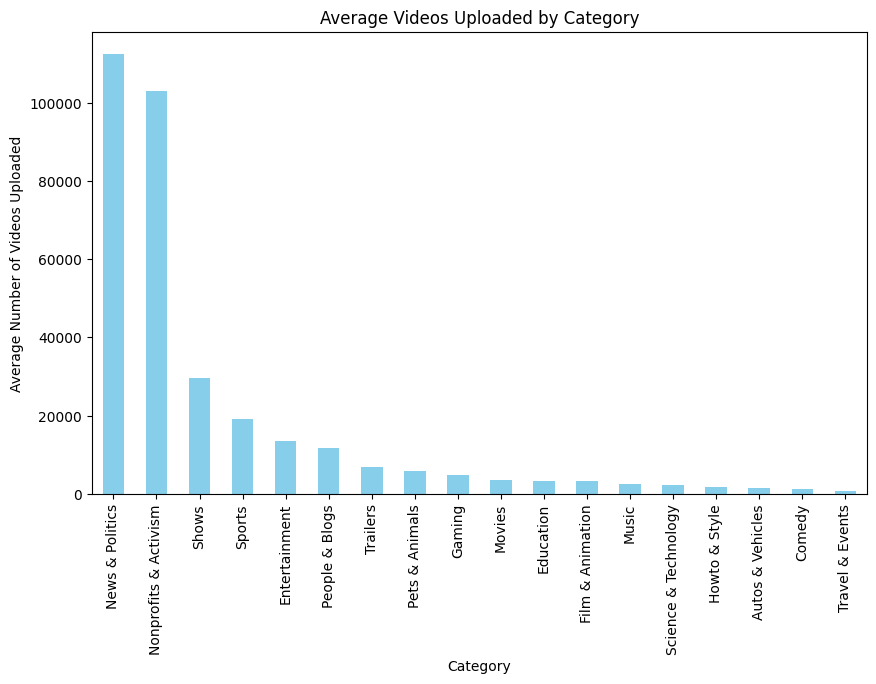

In [16]:
# Plotting the average videos uploaded by category
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
avg_videos_uploaded.plot(kind='bar', color='skyblue')
plt.title('Average Videos Uploaded by Category')
plt.xlabel('Category')
plt.ylabel('Average Number of Videos Uploaded')
plt.xticks(rotation=90)
plt.show()


# 4. Top 5 Countries with Highest Number of YouTube Channels

In [17]:
# Group by 'Country' and count the number of YouTube channels
top_5_countries = df.groupby('Country').size().sort_values(ascending=False).head(5)

# Display the result
print(top_5_countries)

Country
United States     292
India             162
Brazil             61
United Kingdom     43
Mexico             32
dtype: int64


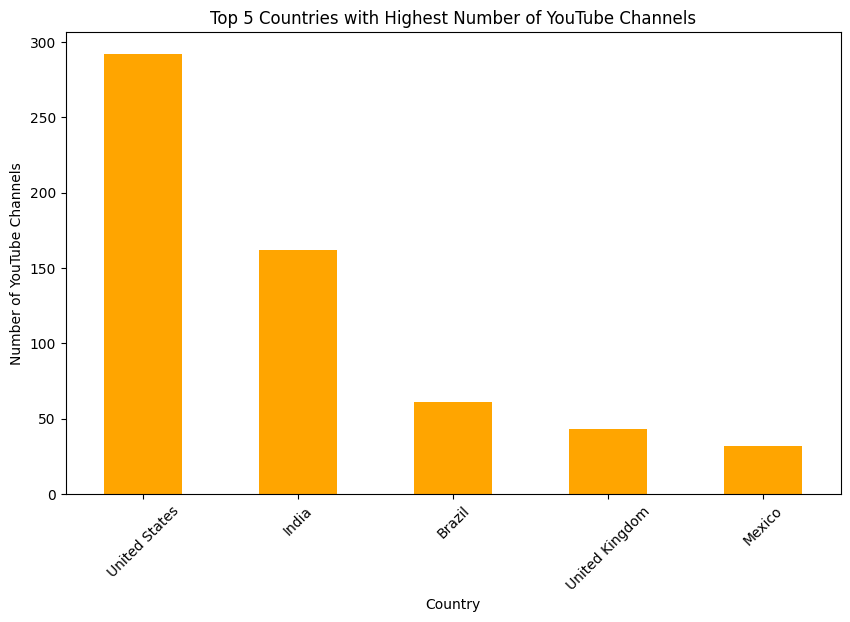

In [18]:
# Plotting the top 5 countries with the highest number of YouTube channels
plt.figure(figsize=(10,6))
top_5_countries.plot(kind='bar', color='orange')
plt.title('Top 5 Countries with Highest Number of YouTube Channels')
plt.xlabel('Country')
plt.ylabel('Number of YouTube Channels')
plt.xticks(rotation=45)
plt.show()


# 5. Distribution of Channel Types Across Categories


In [19]:
# Group by 'category' and 'channel_type' and count the number of channels
channel_distribution = df.groupby(['category', 'channel_type']).size().reset_index(name='count')

# Pivot the table for visualization
pivot_distribution = channel_distribution.pivot(index='category', columns='channel_type', values='count').fillna(0)

<Figure size 1200x800 with 0 Axes>

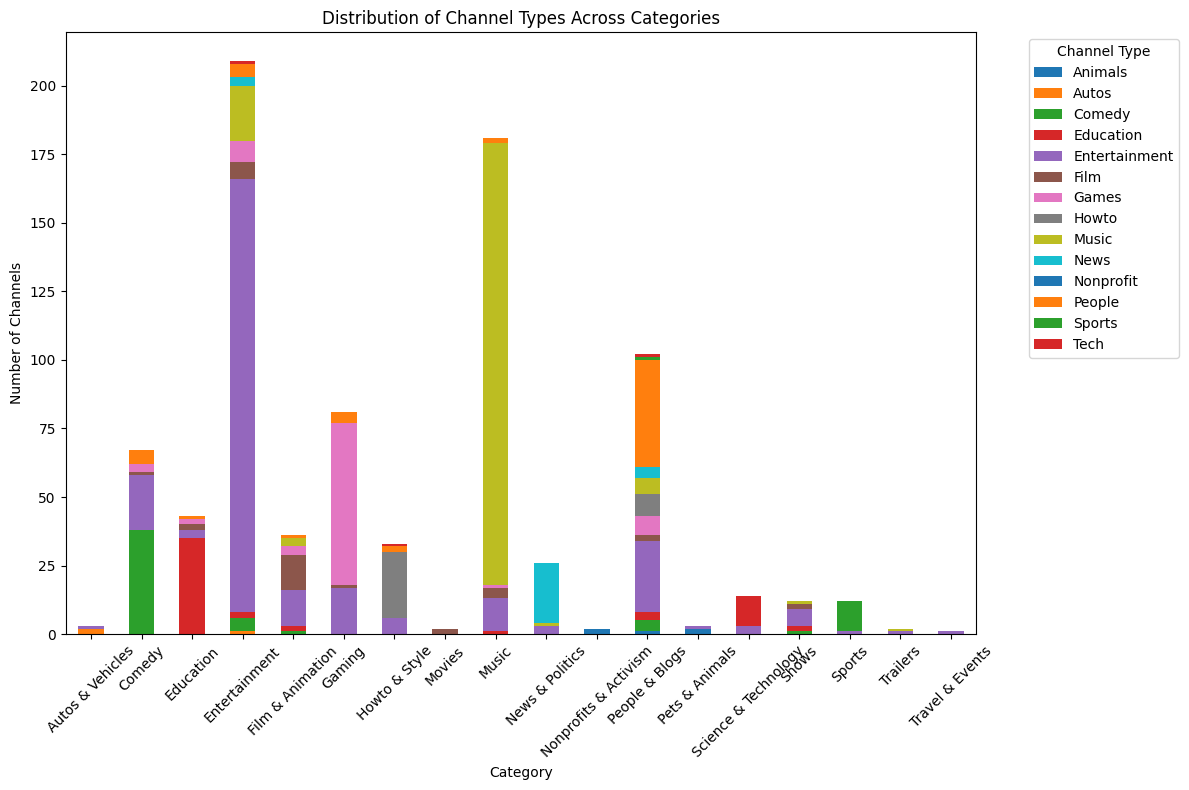

In [20]:
 #Plotting the distribution of channel types across categories
plt.figure(figsize=(12, 8))
pivot_distribution.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribution of Channel Types Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Channels')
plt.xticks(rotation=45)
plt.legend(title='Channel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# 6. Correlation Between Subscribers and Video Views

In [21]:
correlation = df['subscribers'].corr(df['video views'])
print(correlation)

0.8001158046790156


# 7. Monthly Earnings Across Categories

In [22]:
df['average_monthly_earnings'] = (df['lowest_monthly_earnings'] + df['highest_monthly_earnings']) / 2

# Calculate the average monthly earnings for each category
average_earnings_by_category = df.groupby('category')['average_monthly_earnings'].mean().reset_index()

# Sort the results for better visualization
average_earnings_by_category = average_earnings_by_category.sort_values(by='average_monthly_earnings', ascending=False)

# Print the average earnings by category
print(average_earnings_by_category)

                 category  average_monthly_earnings
14                  Shows              1.172504e+06
0        Autos & Vehicles              6.329333e+05
12         Pets & Animals              5.629333e+05
15                 Sports              5.210708e+05
2               Education              4.236478e+05
4        Film & Animation              3.818208e+05
3           Entertainment              3.507656e+05
1                  Comedy              3.483584e+05
9         News & Politics              3.414123e+05
8                   Music              3.192437e+05
11         People & Blogs              3.022117e+05
7                  Movies              2.415500e+05
10  Nonprofits & Activism              2.074000e+05
16               Trailers              1.922500e+05
5                  Gaming              1.632504e+05
13   Science & Technology              1.094179e+05
6           Howto & Style              7.793318e+04
17        Travel & Events              6.590000e+04


# 8. Trend in Subscribers Gained in Last 30 Days

In [23]:
df_trend = df.dropna(subset=['subscribers_for_last_30_days'])

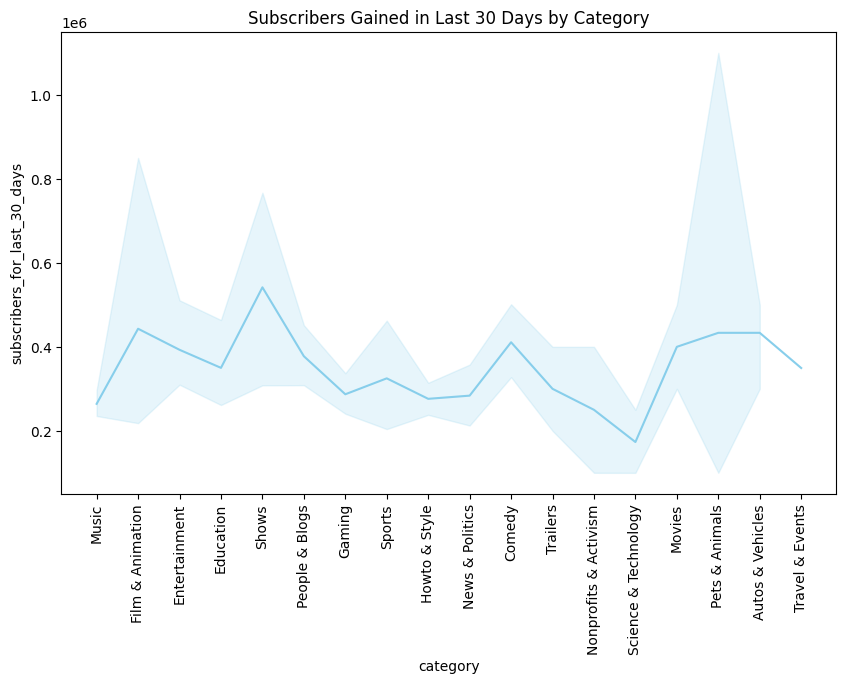

In [84]:
# Visualize the trend in subscribers gained over the last 30 days by category
plt.figure(figsize=(10,6))
sns.lineplot(x='category', y='subscribers_for_last_30_days', data=df_trend, color= 'skyblue')
plt.xticks(rotation=90)
plt.title("Subscribers Gained in Last 30 Days by Category")
plt.show()

# 9. Outliers in Yearly Earnings



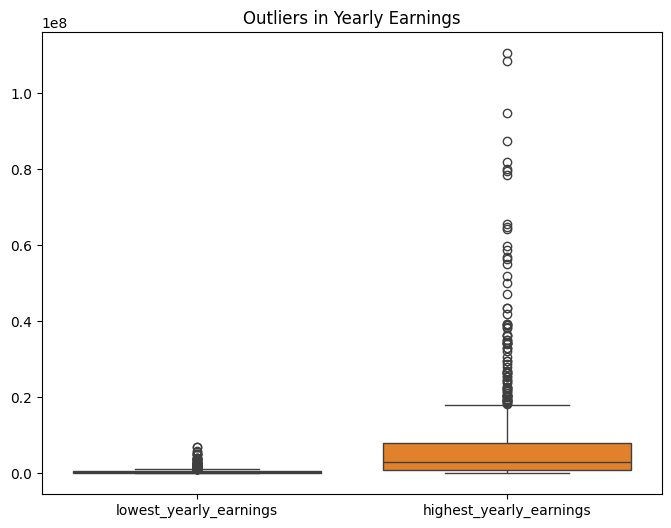

In [25]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['lowest_yearly_earnings', 'highest_yearly_earnings']])
plt.title("Outliers in Yearly Earnings")
plt.show()


# 10. Distribution of Channel Creation Dates

In [26]:
# Converting 'created_date' to datetime format
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')


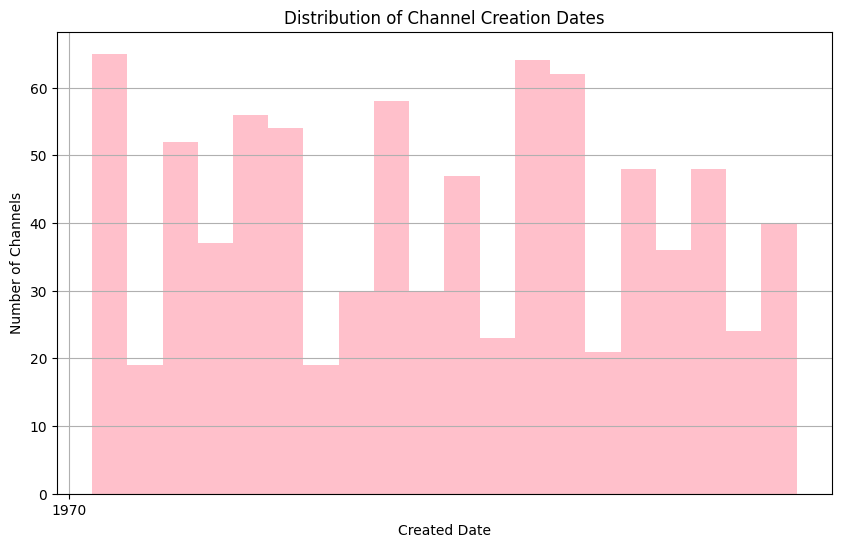

In [83]:
# Plotting the distribution of creation dates
plt.figure(figsize=(10,6))
df['created_date'].hist(bins=20,color = 'pink')
plt.title("Distribution of Channel Creation Dates")
plt.xlabel('Created Date')
plt.ylabel('Number of Channels')
plt.show()

# 11. Relationship Between Education Enrollment and Number of Channels

In [28]:
# 1. Count the number of channels per country
channels_per_country = df.groupby('Country')['Youtuber'].count().reset_index()
channels_per_country.rename(columns={'Youtuber': 'number_of_channels'}, inplace=True)

# 2. Extract the relevant education enrollment data
enrollment_data = df[['Country', 'Gross tertiary education enrollment (%)']].drop_duplicates()

# 3. Merge the two DataFrames
merged_data = pd.merge(channels_per_country, enrollment_data, on='Country', how='inner')

# Check if there are any nulls
print(merged_data.isnull().sum())

Country                                    0
number_of_channels                         0
Gross tertiary education enrollment (%)    1
dtype: int64


In [29]:
merged_data['Gross tertiary education enrollment (%)'].fillna(merged_data['Gross tertiary education enrollment (%)'].mean(), inplace=True)

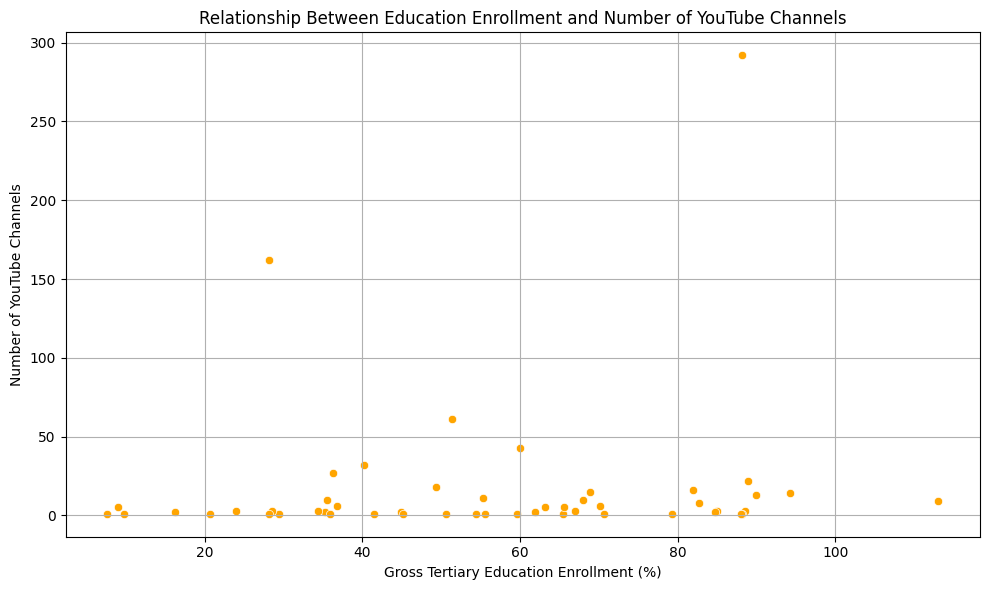

In [80]:
#Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='Gross tertiary education enrollment (%)', y='number_of_channels', color='orange')
plt.title('Relationship Between Education Enrollment and Number of YouTube Channels')
plt.xlabel('Gross Tertiary Education Enrollment (%)')
plt.ylabel('Number of YouTube Channels')
plt.grid(True)
plt.tight_layout()
plt.show()

# 12. Unemployment Rate in Top 10 Countries

In [31]:
top_10_countries = df['Country'].value_counts().head(10).index
unemployment_top_10 = df[df['Country'].isin(top_10_countries)].groupby('Country')['Unemployment rate'].mean()
print(unemployment_top_10)


Country
Brazil            12.08
Canada             5.56
India              5.36
Indonesia          4.69
Mexico             3.42
Russia             4.59
Spain             13.96
Thailand           0.75
United Kingdom     3.85
United States     14.70
Name: Unemployment rate, dtype: float64


# 13. Average Urban Population Percentage

In [32]:
avg_urban_population = df['Urban_population'].mean()
print(avg_urban_population)


223828909.29016787


# 14. Distribution Based on Latitude and Longitude

In [33]:
print(df[['Latitude', 'Longitude']].isnull().sum())


Latitude     1
Longitude    1
dtype: int64


In [42]:
# Step 2: Drop rows with null values in Latitude or Longitude
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

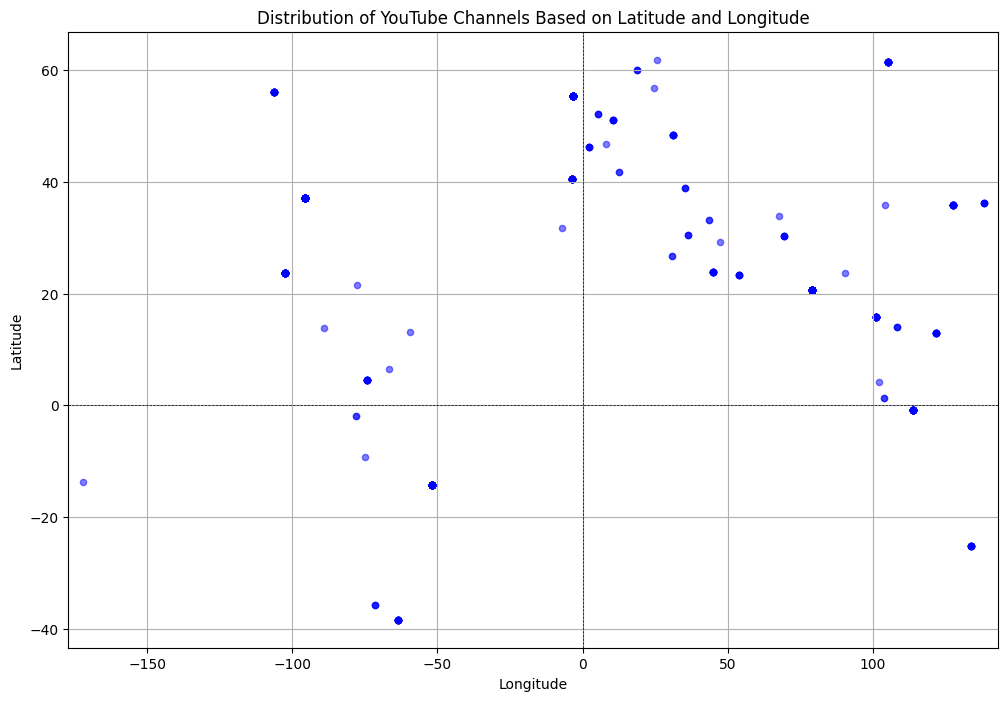

In [43]:
# Step 3: Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(df_cleaned['Longitude'], df_cleaned['Latitude'], alpha=0.5, s=20, c='blue')
plt.title('Distribution of YouTube Channels Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.xlim(df_cleaned['Longitude'].min() - 5, df_cleaned['Longitude'].max() + 5)  # Adjust limits for better visualization
plt.ylim(df_cleaned['Latitude'].min() - 5, df_cleaned['Latitude'].max() + 5)      # Adjust limits for better visualization
plt.axhline(0, color='black',linewidth=0.5, ls='--')  # Add x-axis line
plt.axvline(0, color='black',linewidth=0.5, ls='--')  # Add y-axis line
plt.show()

# 15. Correlation Between Subscribers and Population




In [44]:
print(df[['subscribers', 'Population']].isnull().sum())


subscribers    0
Population     1
dtype: int64


In [45]:
df_cleaned = df.dropna(subset=['subscribers', 'Population'])


In [47]:
correlation = df_cleaned['subscribers'].corr(df_cleaned['Population'])
print(f"Correlation between Subscribers and Population: {correlation:.4f}")

Correlation between Subscribers and Population: 0.0933


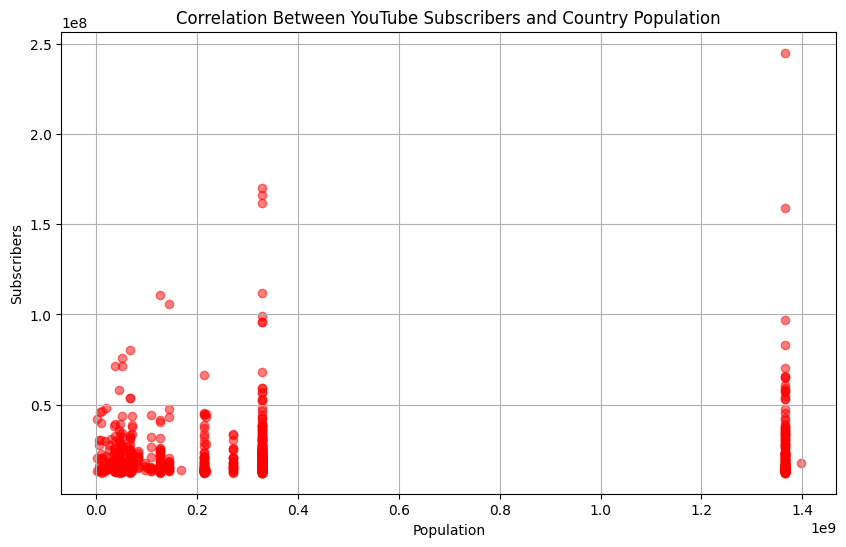

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Population'], df_cleaned['subscribers'], alpha=0.5, color='red')
plt.title('Correlation Between YouTube Subscribers and Country Population')
plt.xlabel('Population')
plt.ylabel('Subscribers')
plt.grid(True)

# 16. Comparison of Top 10 Countries by Population

In [51]:
top_countries = df[['Country', 'Population']].sort_values(by='Population', ascending=False).head(10)


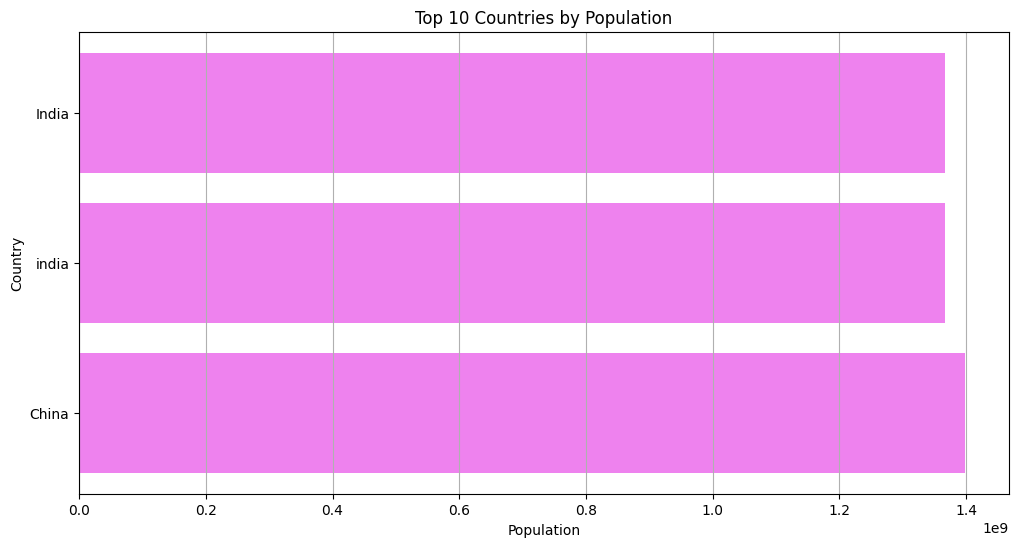

In [78]:
# Step 3: Create a bar plot
plt.figure(figsize=(12, 6))
plt.barh(top_countries['Country'], top_countries['Population'], color='violet')
plt.title('Top 10 Countries by Population')
plt.xlabel('Population')
plt.ylabel('Country')
plt.grid(axis='x')

# Show the plot
plt.show()

## 17. Correlation Between Subscribers Gained and Unemployment Rate

In [56]:
data = df[['subscribers_for_last_30_days', 'Unemployment rate']].dropna()

correlation = data['subscribers_for_last_30_days'].corr(data['Unemployment rate'])
print(f'Correlation between subscribers gained and unemployment rate: {correlation}')


Correlation between subscribers gained and unemployment rate: -0.0048015905850719715


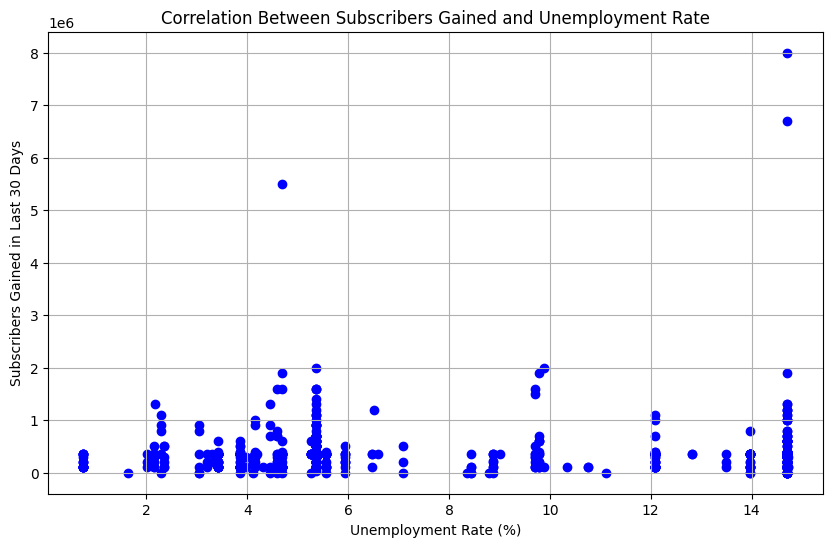

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Unemployment rate'], data['subscribers_for_last_30_days'], color='blue')
plt.title('Correlation Between Subscribers Gained and Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Subscribers Gained in Last 30 Days')
plt.grid()

# Show the plot
plt.show()

# 18. Video Views for Last 30 Days by Channel Type

In [59]:
views_by_channel_type = df.groupby('channel_type')['video_views_for_the_last_30_days'].sum().reset_index()

# Sort the results for better visualization
views_by_channel_type = views_by_channel_type.sort_values(by='video_views_for_the_last_30_days', ascending=False)



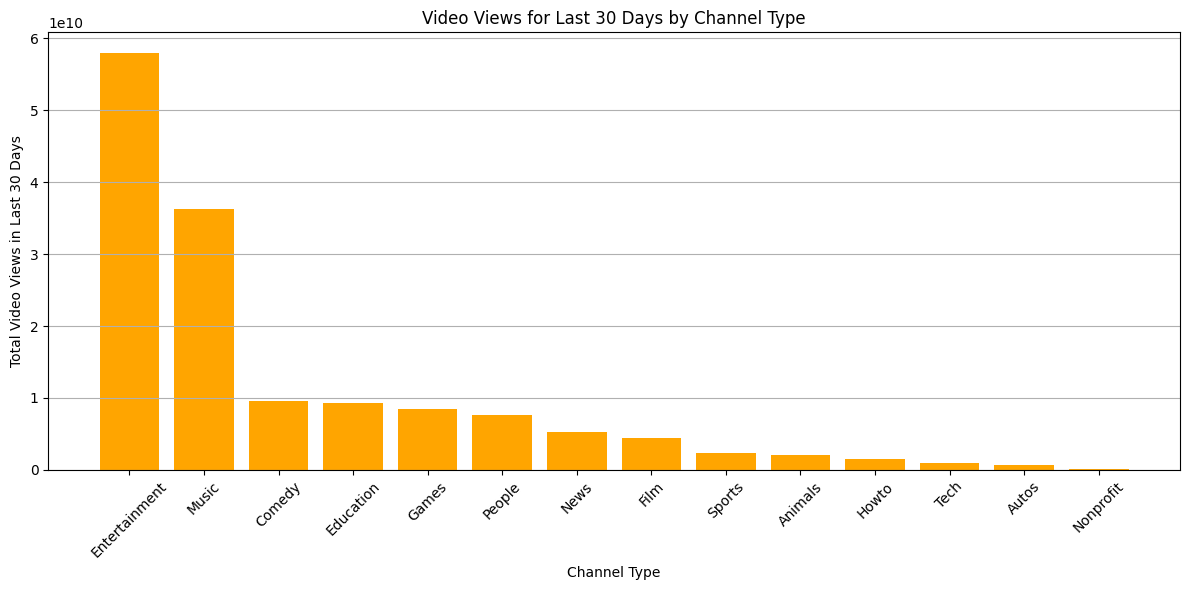

In [87]:
plt.figure(figsize=(12, 6))
plt.bar(views_by_channel_type['channel_type'], views_by_channel_type['video_views_for_the_last_30_days'], color='orange')
plt.title('Video Views for Last 30 Days by Channel Type')
plt.xlabel('Channel Type')
plt.ylabel('Total Video Views in Last 30 Days')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

# 19. Seasonal Trends in Videos Uploaded:

In [62]:
# Step 1: Convert created_date to datetime if it's not already
df['created_date'] = pd.to_datetime(df['created_date'], errors='coerce')

# Extract year and month for analysis
df['year_month'] = df['created_date'].dt.to_period('M')  # Change to 'Q' for quarterly analysis

# Step 2: Group by year_month and count uploads
uploads_by_month = df.groupby('year_month')['uploads'].sum().reset_index()


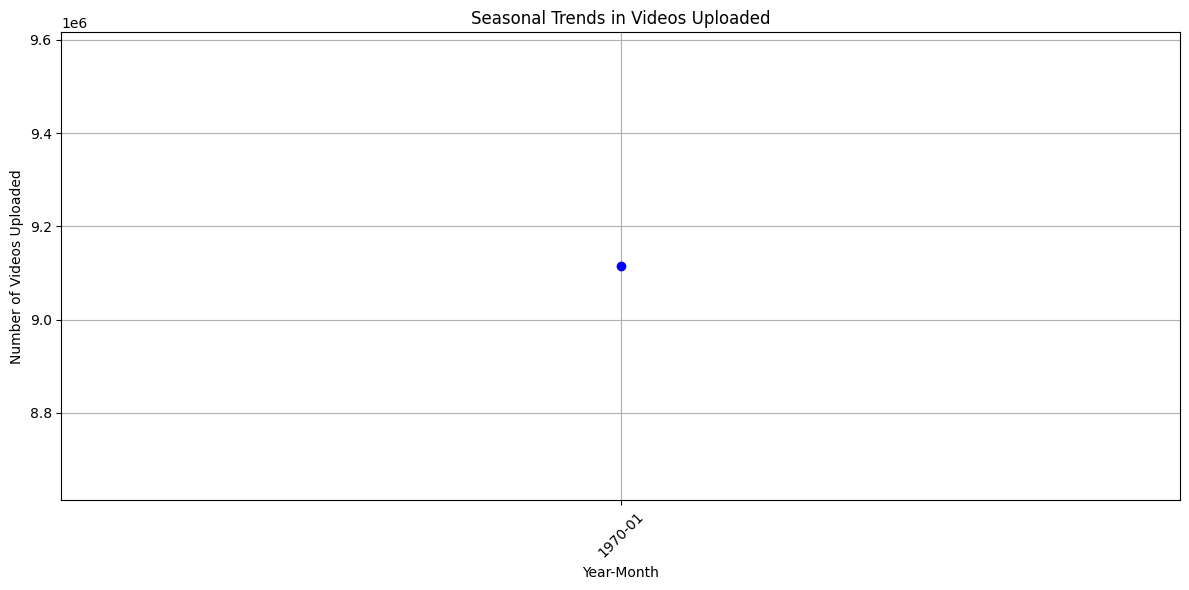

In [63]:
# Step 3: Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(uploads_by_month['year_month'].astype(str), uploads_by_month['uploads'], marker='o', color='blue')
plt.title('Seasonal Trends in Videos Uploaded')
plt.xlabel('Year-Month')
plt.ylabel('Number of Videos Uploaded')
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# 20. Average Number of Subscribers Gained Per Month Since Creation

In [65]:
# Check for missing values in created_date
missing_dates = df['created_date'].isnull().sum()
print(f'Missing created_date values: {missing_dates}')

Missing created_date values: 2


In [66]:
df = df.dropna(subset=['created_date'])

In [68]:
# Get the current date
current_date = pd.to_datetime('today')

# Step 2: Calculate the number of months since creation
df['months_since_creation'] = ((current_date - df['created_date']) / pd.Timedelta(days=30)).astype(int)

# Step 3: Calculate average subscribers gained per month
df['average_subscribers_per_month'] = df['subscribers'] / df['months_since_creation'].replace(0, 1)  # Avoid division by zero

# Step 4: Calculate the overall average (optional)
overall_average_subscribers_per_month = df['average_subscribers_per_month'].mean()

print(f'Overall Average Subscribers Gained Per Month: {overall_average_subscribers_per_month:.2f}')


Overall Average Subscribers Gained Per Month: 34739.09


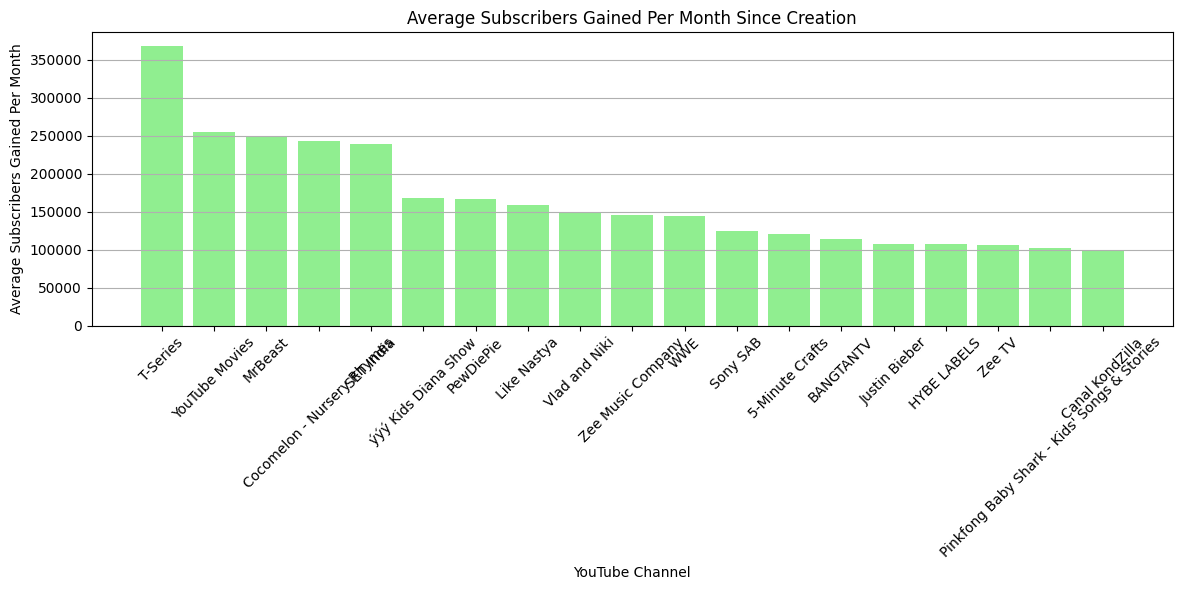

In [86]:
#Step 6: Visualize the average subscribers gained per month
plt.figure(figsize=(12, 6))

top_n = 20  # For example, display the top 20 channels
df_top = df.nlargest(top_n, 'average_subscribers_per_month')
plt.bar(df_top['Youtuber'], df_top['average_subscribers_per_month'], color='lightgreen')
plt.title('Average Subscribers Gained Per Month Since Creation')
plt.xlabel('YouTube Channel')
plt.ylabel('Average Subscribers Gained Per Month')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()